# Tratamiento de curvas v2

Tras muchos problemas tratando los datos de medida, me veo obligada a simplificar la vida de una comercializadora y reducir mi data set.

Me voy a quedar solamente con aquellos puntos de los que tengo curva horaria completa para el periodo de dos años (2017-2018), y lo voy a reducir a tres zonas geograficas (Norte, Centro y Sur)

Empiezo igual que con el notebook anterior, pero voy rodeando problemas y buscando soluciones alternativas

# Importar librerias necesarias

In [49]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import numpy as np
import numpy.ma as ma
import seaborn as sns
import datetime as dt
from datetime import timedelta


# Lectura de los datos

Tengo toda la información de curvas de medida en dos ficheros excel, cada uno de los ficheros tiene varias pestañas por lo que tengo que unir toda la información en un solo data frame.

No voy a leer las columnas del fichero, son las mismas y me ahorro el tiempo que tardo en acceder al fichero y leer las pestañas

In [ ]:
# excel_document_17 = openpyxl.load_workbook('./data/Cups2017.xlsx')

In [ ]:
# excel_document_17.get_sheet_names()

### Unificar los datos. 

Accedemos al fichero excel y creamos un data frame de cada una de las pestaña, a continuación unimos todos los data frame en uno solo.

In [49]:
xlsx_2017 = pd.ExcelFile('./data/Cups2017.xlsx') 

df1 = pd.read_excel(xlsx_2017, 'Page 1') 
df2 = pd.read_excel(xlsx_2017, 'Page 2') 
df3 = pd.read_excel(xlsx_2017, 'Page 3') 
df4 = pd.read_excel(xlsx_2017, 'Page 4')

In [69]:
df_2017 = pd.concat([df1, df2, df3, df4])
df_2017.head(5)

,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--
0,ES0021000000274345SK,0P,2017-01-01,1,0.330,0.42207,0.330
1,ES0021000000274345SK,0P,2017-01-01,2,0.152,0.19456,0.152
2,ES0021000000274345SK,0P,2017-01-01,3,0.273,0.34944,0.273
3,ES0021000000274345SK,0P,2017-01-01,4,0.156,0.19968,0.156
4,ES0021000000274345SK,0P,2017-01-01,5,0.311,0.39808,0.311


Comprobamos que la unión de los ficheros es correcta y que el resultado df_2017 es la suma de los cuatro df anteriores

In [52]:
df1.count()

--Cups20--                        1018179
--Line--                          1018179
--Fecha--                         1018179
--Hora--                          1018179
--Active--                        1018179
--Active With Transport Loss--    1018179
--Active With Transform Loss--    1018179
dtype: int64

In [53]:
df2.count()

--Cups20--                        1030560
--Line--                          1030560
--Fecha--                         1030560
--Hora--                          1030560
--Active--                        1030560
--Active With Transport Loss--    1030560
--Active With Transform Loss--    1030560
dtype: int64

In [54]:
df3.count()

--Cups20--                        820335
--Line--                          820335
--Fecha--                         820335
--Hora--                          820335
--Active--                        820335
--Active With Transport Loss--    820335
--Active With Transform Loss--    820335
dtype: int64

In [55]:
df4.count()

--Cups20--                        837613
--Line--                          837613
--Fecha--                         837613
--Hora--                          837613
--Active--                        837613
--Active With Transport Loss--    837613
--Active With Transform Loss--    837613
dtype: int64

In [56]:
df_2017.count()

--Cups20--                        3706687
--Line--                          3706687
--Fecha--                         3706687
--Hora--                          3706687
--Active--                        3706687
--Active With Transport Loss--    3706687
--Active With Transform Loss--    3706687
dtype: int64

Vamos a crear el data set CUPS_2017 que contiene los CUPS que tengo en mi data set de medidas (df_2017) y el número de horas que tiene para cada uno de los puntos. Con esto lo que vamos a hacer es quedarnos solamente con aquellos CUPS que tengan una curva completa durante 2017.

In [57]:
Cups_2017 = df_2017.groupby(['--Cups20--']).count()


In [58]:
Cups_2017=Cups_2017.reset_index()

In [59]:
Cups_2017=Cups_2017[['--Cups20--', '--Hora--']]

In [60]:
Cups_2017=Cups_2017.rename(columns={'--Hora--' : 'NºHoras'})
Cups_2017.head()

,--Cups20--,NºHoras
0,ES0021000000274345SK,8686
1,ES0021000000274602GW,8018
2,ES0021000000274886QX,8590
3,ES0021000000304938NR,8736
4,ES0021000000506201EZ,8712


In [61]:
df_2017.shape

(3706687, 7)

In [70]:
df_2017=df_2017.merge(Cups_2017, on='--Cups20--', sort=True)

In [63]:
df_2017.shape

(3706687, 8)

In [71]:
df_2017.head()

,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
0,ES0021000000274345SK,0P,2017-01-01,1,0.330,0.42207,0.330,8686
1,ES0021000000274345SK,0P,2017-01-01,2,0.152,0.19456,0.152,8686
2,ES0021000000274345SK,0P,2017-01-01,3,0.273,0.34944,0.273,8686
3,ES0021000000274345SK,0P,2017-01-01,4,0.156,0.19968,0.156,8686
4,ES0021000000274345SK,0P,2017-01-01,5,0.311,0.39808,0.311,8686


Me quedo solamente con aquellos puntos que tienen una curva de medida completa para todo el año, eso es, aquellos que tengan 8760 horas


<BarContainer object of 553 artists>

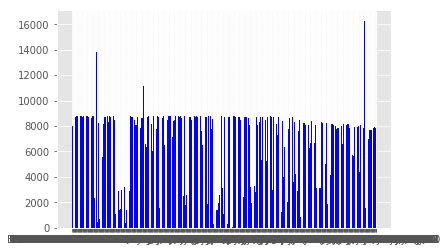

In [103]:
plt.bar(Cups_2017['--Cups20--'], Cups_2017['NºHoras'], width=1/1.5, color='blue')

En el grafico podemos ver que para algunos puntos tenemos medida duplicada porque tienen un número de horas anuales mayor del esperado, esto es algo que suele pasar.

Para evitar este problema, vamos a descartar también estos puntos y nos quedamos solo con aquellos que tienen curva completa y sin duplicados.

In [77]:
df_2017=df_2017[(df_2017['NºHoras']==8760)]

In [78]:
df_2017.describe()

,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
count,595680.000000,595680.000000,595680.000000,595680.000000,595680.0
mean,12.500000,0.747121,0.872294,0.747121,8760.0
std,6.922192,1.678621,1.952005,1.678621,0.0
min,1.000000,0.000000,0.000000,0.000000,8760.0
25%,6.750000,0.029000,0.034100,0.029000,8760.0
50%,12.500000,0.187000,0.221155,0.187000,8760.0
75%,18.250000,0.668000,0.786310,0.668000,8760.0
max,24.000000,46.653000,55.936950,46.653000,8760.0


## Hacemos el mismo proceso con el excel de 2018

In [79]:
#excel_document_18 = openpyxl.load_workbook('./data/Cups2018.xlsx')
#excel_document_18.get_sheet_names()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  


['Page 1', 'Page 2', 'Page 3', 'Page 4', 'Page 5']

In [115]:
xlsx_18 = pd.ExcelFile('./data/Cups2018.xlsx') 
df11 = pd.read_excel(xlsx_18, 'Page 1') 
df22 = pd.read_excel(xlsx_18, 'Page 2') 
df33 = pd.read_excel(xlsx_18, 'Page 3') 
df44 = pd.read_excel(xlsx_18, 'Page 4') 
df55 = pd.read_excel(xlsx_18, 'Page 5')
df_2018 = pd.concat([df11, df22, df33, df44, df55])
df_2018.head(5)

,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--
0,ES0021000004654210GL,0P,2018-01-01,1,0.0,0.0,0.0
1,ES0021000004654210GL,0P,2018-01-01,2,0.0,0.0,0.0
2,ES0021000004654210GL,0P,2018-01-01,3,0.0,0.0,0.0
3,ES0021000004654210GL,0P,2018-01-01,4,0.0,0.0,0.0
4,ES0021000004654210GL,0P,2018-01-01,5,0.0,0.0,0.0


In [116]:
Cups_2018 = df_2018.groupby(['--Cups20--']).count()
Cups_2018=Cups_2018.reset_index()


In [117]:
Cups_2018=Cups_2018[['--Cups20--', '--Hora--']]
Cups_2018=Cups_2018.rename(columns={'--Hora--' : 'NºHoras'})
Cups_2018.head()


,--Cups20--,NºHoras
0,ES0021000000274345SK,7896
1,ES0021000000274602GW,7224
2,ES0021000000274886QX,7872
3,ES0021000000304938NR,7896
4,ES0021000000506201EZ,7872


In [118]:
df_2018.shape


(4118516, 7)

In [119]:
df_2018=df_2018.merge(Cups_2018, on='--Cups20--', sort=True)


In [120]:
df_2018.shape


(4118516, 8)

In [121]:
df_2018.head()


,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
0,ES0021000000274345SK,0P,2018-01-01,1,0.467,0.59776,0.467,7896
1,ES0021000000274345SK,0P,2018-01-01,2,0.479,0.61312,0.479,7896
2,ES0021000000274345SK,0P,2018-01-01,3,0.500,0.64000,0.500,7896
3,ES0021000000274345SK,0P,2018-01-01,4,0.457,0.58496,0.457,7896
4,ES0021000000274345SK,0P,2018-01-01,5,0.499,0.63872,0.499,7896


Para 2018 solo tengo datos de medidas hasta noviembre, por lo que el número medidas horarias que debe tener cada punto es de 8016

In [123]:
df_2018=df_2018[(df_2018['NºHoras']==8016)]


In [124]:
df_2018.describe()

,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
count,280560.000000,280560.000000,280560.000000,280560.000000,280560.0
mean,12.500000,0.994323,1.152116,0.994320,8016.0
std,6.922199,1.460470,1.688435,1.460472,0.0
min,1.000000,0.000000,0.000000,0.000000,8016.0
25%,6.750000,0.112000,0.131040,0.112000,8016.0
50%,12.500000,0.351000,0.410700,0.351000,8016.0
75%,18.250000,1.337000,1.561932,1.337000,8016.0
max,24.000000,19.628000,22.998280,19.628000,8016.0


In [72]:
plt.figure(figsize=(25,10))
plt.bar(Cups_2018['--Cups20--'], Cups_2018['NºHoras'], width=1/1.5, color='blue')


NameError: name 'Cups_2018' is not defined

<Figure size 1800x720 with 0 Axes>

En este caso vemos que hay menos puntos con medidas duplicadas, pero que tenemos un gran número de puntos con muy pocas en este periodo.

# Unimos tanto el fichero de 2017 como el de 2018 y creamos un único fichero con las medidas de 2017 y 2018

Comprobamos que el fichero final es efectivamente la suma de los dos ficheros originales.

In [126]:
Medidas = pd.concat([df_2017, df_2018])

In [127]:
df_2017.shape

(595680, 8)

In [128]:
df_2018.shape

(280560, 8)

In [129]:
Medidas.shape

(876240, 8)

In [130]:
Medidas.describe()

,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
count,876240.000000,876240.000000,876240.000000,876240.000000,876240.000000
mean,12.500000,0.826272,0.961889,0.826271,8521.781430
std,6.922191,1.616108,1.876204,1.616109,347.111893
min,1.000000,0.000000,0.000000,0.000000,8016.000000
25%,6.750000,0.045000,0.052990,0.045000,8016.000000
50%,12.500000,0.223000,0.263120,0.223000,8760.000000
75%,18.250000,0.885000,1.039192,0.885000,8760.000000
max,24.000000,46.653000,55.936950,46.653000,8760.000000


In [131]:
Medidas.head()

,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
60214,ES0021000000930682DF,0P,2017-01-01,1,0.225,0.28778,0.225,8760
60215,ES0021000000930682DF,0P,2017-01-01,2,0.197,0.25216,0.197,8760
60216,ES0021000000930682DF,0P,2017-01-01,3,0.201,0.25728,0.201,8760
60217,ES0021000000930682DF,0P,2017-01-01,4,0.201,0.25728,0.201,8760
60218,ES0021000000930682DF,0P,2017-01-01,5,0.198,0.25344,0.198,8760


### Formato

Damos un formato mas amigable al fichero cambiando los nombres de las columnas y dando formato fecha correcto.


In [132]:
Medidas = Medidas.rename(columns={'--Cups20--' : 'Cups20',
                                  '--Line--' : 'Line', 
                                  '--Fecha--' : 'Fecha', 
                                  '--Hora--' : 'Hora', 
                                  '--Active--' : 'Active' , 
                                  '--Active With Transport Loss--' : 'Active With Transport Loss', 
                                  '--Active With Transform Loss--' : 'Active With Transform Loss'})

In [133]:
Medidas.head(5)

,Cups20,Line,Fecha,Hora,Active,Active With Transport Loss,Active With Transform Loss,NºHoras
60214,ES0021000000930682DF,0P,2017-01-01,1,0.225,0.28778,0.225,8760
60215,ES0021000000930682DF,0P,2017-01-01,2,0.197,0.25216,0.197,8760
60216,ES0021000000930682DF,0P,2017-01-01,3,0.201,0.25728,0.201,8760
60217,ES0021000000930682DF,0P,2017-01-01,4,0.201,0.25728,0.201,8760
60218,ES0021000000930682DF,0P,2017-01-01,5,0.198,0.25344,0.198,8760


In [134]:
Medidas['Fecha']=pd.to_datetime(Medidas['Fecha'], yearfirst=True,format='%Y-%m-%d')


In [135]:
Medidas.dtypes

Cups20                                object
Line                                  object
Fecha                         datetime64[ns]
Hora                                   int64
Active                               float64
Active With Transport Loss           float64
Active With Transform Loss           float64
NºHoras                                int64
dtype: object

In [136]:
Medidas.head(5)

,Cups20,Line,Fecha,Hora,Active,Active With Transport Loss,Active With Transform Loss,NºHoras
60214,ES0021000000930682DF,0P,2017-01-01,1,0.225,0.28778,0.225,8760
60215,ES0021000000930682DF,0P,2017-01-01,2,0.197,0.25216,0.197,8760
60216,ES0021000000930682DF,0P,2017-01-01,3,0.201,0.25728,0.201,8760
60217,ES0021000000930682DF,0P,2017-01-01,4,0.201,0.25728,0.201,8760
60218,ES0021000000930682DF,0P,2017-01-01,5,0.198,0.25344,0.198,8760


# Contratos

A este fichero de medidas le falta información como la provincia por cliente, la tarifa contratada, o la potencia. Todos estos datos los conseguimos del excel de contratos que vamos a unir a este fichero según el CUPS.

In [137]:
contratos = pd.read_excel('./data/Contratos.xlsx')
contratos.head(5)

,CUPS 20,Tarifa,Provincia,Potencia
0,ES0021000000472013PG,2.0.A,Alicante,6.60
1,ES0021000000951307DR,2.1.A,Alicante,13.20
2,ES0021000003992036XS,2.0.A,Madrid,3.30
3,ES0021000004049366LY,2.0.A,Madrid,3.45
4,ES0021000004146547NN,2.0.A,Madrid,3.45


In [138]:
contratos = contratos.rename(columns={'CUPS 20' : 'Cups20'})
contratos.head(5)

,Cups20,Tarifa,Provincia,Potencia
0,ES0021000000472013PG,2.0.A,Alicante,6.60
1,ES0021000000951307DR,2.1.A,Alicante,13.20
2,ES0021000003992036XS,2.0.A,Madrid,3.30
3,ES0021000004049366LY,2.0.A,Madrid,3.45
4,ES0021000004146547NN,2.0.A,Madrid,3.45


In [139]:
Medidas.shape

(876240, 8)

Comprobamos que despues del merge tengo las mismas líneas que tenía antes, y que no tengo ningún valor NaN

In [140]:
Medidas = Medidas.merge(contratos, on='Cups20', how='left')


In [141]:
Medidas.shape

(876240, 11)

In [142]:
Medidas.isnull().any().any()

False


### Limpieza de datos

Vamos a ver las columnas que tiene el data frame y vamos a quedarnos solo con las necesarias para el analisis.


In [143]:
Medidas.columns

Index(['Cups20', 'Line', 'Fecha', 'Hora', 'Active',
       'Active With Transport Loss', 'Active With Transform Loss', 'NºHoras',
       'Tarifa', 'Provincia', 'Potencia '],
      dtype='object')

In [144]:
Medidas = Medidas[[ 'Provincia', 'Cups20', 'Tarifa','Fecha', 'Hora', 'Active', 'NºHoras']]
Medidas.head(5)

,Provincia,Cups20,Tarifa,Fecha,Hora,Active,NºHoras
0,Alicante,ES0021000000930682DF,2.0.A,2017-01-01,1,0.225,8760
1,Alicante,ES0021000000930682DF,2.0.A,2017-01-01,2,0.197,8760
2,Alicante,ES0021000000930682DF,2.0.A,2017-01-01,3,0.201,8760
3,Alicante,ES0021000000930682DF,2.0.A,2017-01-01,4,0.201,8760
4,Alicante,ES0021000000930682DF,2.0.A,2017-01-01,5,0.198,8760


In [208]:
Medidas.to_csv('Medidas.csv')

Para que un CUPS tenga medida completa en los dos años de estudio debe tener 16.776 horas de consumo, vamos a analizar cuantos puntos tenemos y de cuantos de ellos tenemos medida completa.

In [159]:
Medidas.columns

Index(['Provincia', 'Cups20', 'Tarifa', 'Fecha', 'Hora', 'Active', 'NºHoras'], dtype='object')

In [172]:
Cups = Medidas.groupby(['Cups20']).count()

In [173]:
Cups=Cups.reset_index()

In [174]:
Cups.head()

,Cups20,Provincia,Tarifa,Fecha,Hora,Active,NºHoras
0,ES0021000000930682DF,8760,8760,8760,8760,8760,8760
1,ES0021000000930683DP,8760,8760,8760,8760,8760,8760
2,ES0021000000930684DD,8760,8760,8760,8760,8760,8760
3,ES0021000000930685DX,8760,8760,8760,8760,8760,8760
4,ES0021000000930686DB,8760,8760,8760,8760,8760,8760


In [175]:
Cups=Cups[['Cups20', 'Hora']]
Cups=Cups.rename(columns={'Hora' : 'NºHoras'})


In [177]:
Cups.describe()

,NºHoras
count,103.000000
mean,8507.184466
std,354.113689
min,8016.000000
25%,8016.000000
50%,8760.000000
75%,8760.000000
max,8760.000000


He cogido mi fichero Medidas.csv que contenía la medida de todos los CUPS que ya habíamos filtrado, he creado el fichero Cups con el que he contado las horas de consumo para cada uno de los CUPS, y realizado un Cups.describe, donde veo que el valor minimo de horas es de 8.016, pero valor maximo de horas es de 8.760.

Lo que vemos con esto, es que no tenemos níngún punto para el que tengamos medida comleta para 2017 y para 2018, lo cual es un problema en nuestro planteamiento inicial. Ya que, o tenemos medida completa de 2017, o de 2018, pero no para los dos años.

Por tanto replanteamos y nos quedamos solo con las medidas que tenemos desde el 01/01/2018 al 30/11/2018, descartando toda la medida de 2017, para, poro un lado, simplificar el problema, y por otro lado poder obtener una solución a nuestro planteamiento inicial.

### Volvemos a nuestro fichero de medidas de 2018.

In [179]:
df_2018.head()

,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
2378357,ES0022000004023788QV,1P,2018-01-01,1,0.206,0.26368,0.206,8016
2378358,ES0022000004023788QV,1P,2018-01-01,2,0.205,0.26240,0.205,8016
2378359,ES0022000004023788QV,1P,2018-01-01,3,0.207,0.26496,0.207,8016
2378360,ES0022000004023788QV,1P,2018-01-01,4,0.206,0.26368,0.206,8016
2378361,ES0022000004023788QV,1P,2018-01-01,5,0.205,0.26240,0.205,8016


In [180]:
df_2018.describe()

,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--,NºHoras
count,280560.000000,280560.000000,280560.000000,280560.000000,280560.0
mean,12.500000,0.994323,1.152116,0.994320,8016.0
std,6.922199,1.460470,1.688435,1.460472,0.0
min,1.000000,0.000000,0.000000,0.000000,8016.0
25%,6.750000,0.112000,0.131040,0.112000,8016.0
50%,12.500000,0.351000,0.410700,0.351000,8016.0
75%,18.250000,1.337000,1.561932,1.337000,8016.0
max,24.000000,19.628000,22.998280,19.628000,8016.0


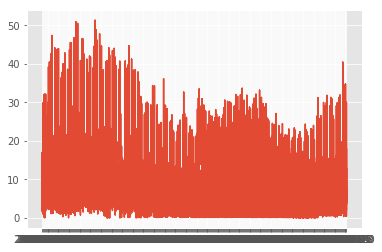

In [54]:

plt.plot(df_2018['--Active--'], type='l')


In [211]:
df_2018.columns

Index(['--Cups20--', '--Line--', '--Fecha--', '--Hora--', '--Active--',
       '--Active With Transport Loss--', '--Active With Transform Loss--',
       'NºHoras'],
      dtype='object')

In [212]:
df_2018 = df_2018.rename(columns={'--Cups20--' : 'Cups20',
                                  '--Line--' : 'Line', 
                                  '--Fecha--' : 'Fecha', 
                                  '--Hora--' : 'Hora', 
                                  '--Active--' : 'Active' , 
                                  '--Active With Transport Loss--' : 'Active With Transport Loss', 
                                  '--Active With Transform Loss--' : 'Active With Transform Loss'})

In [213]:
df_2018.columns

Index(['Cups20', 'Line', 'Fecha', 'Hora', 'Active',
       'Active With Transport Loss', 'Active With Transform Loss', 'NºHoras'],
      dtype='object')

In [215]:
df_2018.shape

(280560, 8)

In [216]:
df_2018 = df_2018.merge(contratos, on='Cups20', how='left')

In [218]:
df_2018.shape

(280560, 11)

In [219]:
df_2018.head()

,Cups20,Line,Fecha,Hora,Active,Active With Transport Loss,Active With Transform Loss,NºHoras,Tarifa,Provincia,Potencia
0,ES0022000004023788QV,1P,2018-01-01,1,0.206,0.26368,0.206,8016,2.0.A,La Coruña,5.75
1,ES0022000004023788QV,1P,2018-01-01,2,0.205,0.26240,0.205,8016,2.0.A,La Coruña,5.75
2,ES0022000004023788QV,1P,2018-01-01,3,0.207,0.26496,0.207,8016,2.0.A,La Coruña,5.75
3,ES0022000004023788QV,1P,2018-01-01,4,0.206,0.26368,0.206,8016,2.0.A,La Coruña,5.75
4,ES0022000004023788QV,1P,2018-01-01,5,0.205,0.26240,0.205,8016,2.0.A,La Coruña,5.75


In [247]:
df_2018=df_2018[['Cups20', 'Provincia', 'Tarifa', 'Fecha', 'Hora', 'Active']]

In [248]:
df_2018.head()

,Cups20,Provincia,Tarifa,Fecha,Hora,Active
0,ES0022000004023788QV,La Coruña,2.0.A,2018-01-01,1,0.206
1,ES0022000004023788QV,La Coruña,2.0.A,2018-01-01,2,0.205
2,ES0022000004023788QV,La Coruña,2.0.A,2018-01-01,3,0.207
3,ES0022000004023788QV,La Coruña,2.0.A,2018-01-01,4,0.206
4,ES0022000004023788QV,La Coruña,2.0.A,2018-01-01,5,0.205


In [249]:
df_2018.dtypes

Cups20        object
Provincia     object
Tarifa        object
Fecha         object
Hora           int64
Active       float64
dtype: object

Antes de agrupar vamos a reducir las tarifas a dos tipos. El comportamiento en cuanto a consumo de la tarifa 2.0A y de la tarifa 2.1A es similar, y lo mismo pasa con las tarifas 2.0DHA y 2.1DHA

A partir de ahora: 

    -Las tarifas 2.0A y 2.1A pasan a ser 2A
    -Las tarifas 2.0DHA y 2.1DHA pasan a ser 2DHA

In [253]:
df_2018.groupby(['Tarifa']).count()

,Unnamed: 0,Cups20,Provincia,Fecha,Hora,Active
Tarifa,,,,,,
2.0.A,160320,160320,160320,160320,160320,160320
2.0DHA,64128,64128,64128,64128,64128,64128
2.1.A,48096,48096,48096,48096,48096,48096
2.1.DHA,8016,8016,8016,8016,8016,8016


In [254]:
df_2018.replace({'Tarifa' : '2.0.A'}, '2A', inplace=True)
df_2018.replace({'Tarifa' : '2.1.A'}, '2A', inplace=True)
df_2018.replace({'Tarifa' : '2.0DHA'}, '2DHA', inplace=True)
df_2018.replace({'Tarifa' : '2.1.DHA'}, '2DHA', inplace=True)

In [255]:
df_2018.groupby(['Tarifa']).count()

,Unnamed: 0,Cups20,Provincia,Fecha,Hora,Active
Tarifa,,,,,,
2A,208416,208416,208416,208416,208416,208416
2DHA,72144,72144,72144,72144,72144,72144


In [256]:
df_2018.head()

,Unnamed: 0,Cups20,Provincia,Tarifa,Fecha,Hora,Active
0,0,ES0022000004023788QV,La Coruña,2A,2018-01-01,1,0.206
1,1,ES0022000004023788QV,La Coruña,2A,2018-01-01,2,0.205
2,2,ES0022000004023788QV,La Coruña,2A,2018-01-01,3,0.207
3,3,ES0022000004023788QV,La Coruña,2A,2018-01-01,4,0.206
4,4,ES0022000004023788QV,La Coruña,2A,2018-01-01,5,0.205


En vez de quedarnos con la segmentación por provincia, vamos a resumir en tres zonas geograficas: Norte, Centro y Sur.

Tenemos el data set Comunidades donde tenemos segmetados las provincias por estas tres zonas geograficas. Vamos a leerlo y unirlos.

In [258]:
Comunidades =pd.read_excel('./data/Comunidades.xlsx')

In [261]:
df_2018 = df_2018.merge(Comunidades, on='Provincia')

In [263]:
df_2018.head()

,Unnamed: 0,Cups20,Provincia,Tarifa,Fecha,Hora,Active,Comunidad,Zona
0,0,ES0022000004023788QV,La Coruña,2A,2018-01-01,1,0.206,Galicia,Norte
1,1,ES0022000004023788QV,La Coruña,2A,2018-01-01,2,0.205,Galicia,Norte
2,2,ES0022000004023788QV,La Coruña,2A,2018-01-01,3,0.207,Galicia,Norte
3,3,ES0022000004023788QV,La Coruña,2A,2018-01-01,4,0.206,Galicia,Norte
4,4,ES0022000004023788QV,La Coruña,2A,2018-01-01,5,0.205,Galicia,Norte


In [265]:
df_2018 = df_2018.groupby(['Zona', 'Tarifa', 'Fecha', 'Hora']).sum()

df_2018 = df_2018.reset_index()


,Zona,Tarifa,Fecha,Hora,Unnamed: 0,Active
0,Centro,2A,2018-01-01,1,1170336,7.401
1,Centro,2A,2018-01-01,2,1170345,7.510
2,Centro,2A,2018-01-01,3,1170354,6.951
3,Centro,2A,2018-01-01,4,1170363,5.876
4,Centro,2A,2018-01-01,5,1170372,6.667
5,Centro,2A,2018-01-01,6,1170381,4.560
6,Centro,2A,2018-01-01,7,1170390,4.709
7,Centro,2A,2018-01-01,8,1170399,5.225
8,Centro,2A,2018-01-01,9,1170408,4.185
9,Centro,2A,2018-01-01,10,1170417,8.045


In [273]:
df_2018 = df_2018[['Zona', 'Tarifa', 'Fecha', 'Hora', 'Active']]


In [274]:
df_2018.head()


,Zona,Tarifa,Fecha,Hora,Active
0,Centro,2A,2018-01-01,1,7.401
1,Centro,2A,2018-01-01,2,7.510
2,Centro,2A,2018-01-01,3,6.951
3,Centro,2A,2018-01-01,4,5.876
4,Centro,2A,2018-01-01,5,6.667


In [56]:
# df_2018.to_csv('df_2018.csv')
#df_2018=pd.read_csv('df_2018.csv')
#df_2018.head(5)


,Unnamed: 0,Zona,Tarifa,Fecha,Hora,Active
0,0,Centro,2A,2018-01-01,1,7.401
1,1,Centro,2A,2018-01-01,2,7.510
2,2,Centro,2A,2018-01-01,3,6.951
3,3,Centro,2A,2018-01-01,4,5.876
4,4,Centro,2A,2018-01-01,5,6.667


Para que el tratamiento por fechas sea mas sencillo voy a combinar las fechas y las horas, para crearme un único dato que incluya fecha y hora en un mismo valor.

In [58]:
df_2018['Fecha'] = pd.to_datetime(df_2018['Fecha'], format='%Y-%m-%d')

In [59]:
df_2018['Hora'] = pd.to_timedelta(df_2018['Hora'], unit='h')

In [60]:
df_2018.head()

,Unnamed: 0,Zona,Tarifa,Fecha,Hora,Active
0,0,Centro,2A,2018-01-01,01:00:00,7.401
1,1,Centro,2A,2018-01-01,02:00:00,7.510
2,2,Centro,2A,2018-01-01,03:00:00,6.951
3,3,Centro,2A,2018-01-01,04:00:00,5.876
4,4,Centro,2A,2018-01-01,05:00:00,6.667


In [61]:
df_2018.dtypes

Unnamed: 0              int64
Zona                   object
Tarifa                 object
Fecha          datetime64[ns]
Hora          timedelta64[ns]
Active                float64
dtype: object

In [63]:
df_2018['datetime']=df_2018['Fecha']+df_2018['Hora']

In [65]:
df_2018.head()

,Unnamed: 0,Zona,Tarifa,Fecha,Hora,Active,datetime
0,0,Centro,2A,2018-01-01,01:00:00,7.401,2018-01-01 01:00:00
1,1,Centro,2A,2018-01-01,02:00:00,7.510,2018-01-01 02:00:00
2,2,Centro,2A,2018-01-01,03:00:00,6.951,2018-01-01 03:00:00
3,3,Centro,2A,2018-01-01,04:00:00,5.876,2018-01-01 04:00:00
4,4,Centro,2A,2018-01-01,05:00:00,6.667,2018-01-01 05:00:00


In [66]:
df_2018.dtypes

Unnamed: 0              int64
Zona                   object
Tarifa                 object
Fecha          datetime64[ns]
Hora          timedelta64[ns]
Active                float64
datetime       datetime64[ns]
dtype: object

Guardamos el fichero y lo conservamos en el formato correcto para poder analizarlo en el proximo notebook. Voy a guardar unicamente las columnas que me interesan a nivel de analisis de datos.

In [69]:
df_2018.columns

Index(['Unnamed: 0', 'Zona', 'Tarifa', 'Fecha', 'Hora', 'Active', 'datetime'], dtype='object')

In [70]:
df_2018=df_2018[['datetime', 'Zona', 'Tarifa', 'Active']]

In [74]:
df_2018.to_csv('./data_processed/df_2018.csv')